## Tokyo 2020 Olympic Games
### A Dataset of WW2 Aircraft Models

#### Content
This dataset contains information about number of athletes whose medals are Gold, Silver or Bronze in terms of Sport Event

The dataset is prepared by me

Here is the link which I get a dataframe via Web Scraping : http://www.olympedia.org/editions/61/medal

## Content

<ul>
  <li><a href="#part1">1. Loading Data and Checking Values</a></li>
  <li><a href="#part2">2. Description of  Columns in the Dataframe</a>
  <li><a href="#part3">3. Data Wrangling</a>
    <ul>
      <li><a href="#part3-1">3.1 Define function to show all values in the table</a></li>
      <li><a href="#part3-2">3.2 Define funtions to show country flag in Bar Graph</a></li>
      <li><a href="#part3-3">3.3 Defining drawnestedpiegraph function to show nested pie graph</a></li>  
    </ul>
  </li>
  <li><a href="#part4">4. Data Visualization</a>
    <ul>
      <li><a href="#part4-1">4.1 Define bar graph showing the total medal count of the Olympic Games by Sport Event and Medal Type</a></li>
      <li><a href="#part4-2">4.2 Define bar graph showing the number of medal by Top 10 Countries</a></li>
      <li><a href="#part4-3">4.3 Define a nested pie graph to determine which the medal type were won by athletes in terms of Category Gender Type in Top 10 Countries </a></li>
      <li><a href="#part4-4">4.4 Define a table graph to show the top 10 number of medal won by athletes in terms of Sport Event by Country Code</a></li>  
      <li><a href="#part4-5">4.5 Draw a WordCloud to show medal-winning athletes' names </a></li>  
    </ul>
  </li>
</ul>

<a id='part1'></a>
## 1. Loading Data and Checking Values

1 - Import libraries I used for visualization

In [738]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import display, HTML
from plotly.subplots import make_subplots
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator 
from PIL import Image, ImageOps
import plotly.io as pio
import random
import datetime
import matplotlib.colors as mcolors
import six
import requests
from matplotlib.offsetbox import OffsetImage,AnnotationBbox

import warnings
warnings.filterwarnings('ignore')

sns.set(style="darkgrid")

plt.style.use('seaborn')

2 - Define dataframe for Tokyo 2020 Olympic Games

In [739]:
file_location_url = "files/tokyo_2020.csv";

tokyo_2020_df = pd.read_csv(file_location_url, 
                             error_bad_lines=False,
                             warn_bad_lines = False,
                             encoding = "utf-8")

3 - Deterime how many rows and columns are defined in the dataframe

In [740]:
row_count = tokyo_2020_df.shape[0]
column_count = tokyo_2020_df.shape[1]

print("WW2 Aircraft -- Row : {} , Column : {}".format(row_count,column_count))

WW2 Aircraft -- Row : 946 , Column : 9


4 - Show first 5 values of the dataframe

In [741]:
tokyo_2020_df.head()

,Unnamed: 0,index,Category,Category_Gender,Medal,Athlete_Full_Name,Country_IMG_URL,Country_Code,Sport_Event
0,0,0,3x3 Basketball,Men,Gold,Latvia,https://www.olympedia.org/images/flags/LAT.png,LAT,3x3 Basketball
1,1,1,3x3 Basketball,Men,Silver,Russian Olympic Committee,https://www.olympedia.org/images/flags/ROC.png,ROC,3x3 Basketball
2,2,2,3x3 Basketball,Men,Bronze,Serbia,https://www.olympedia.org/images/flags/SRB.png,SRB,3x3 Basketball
3,3,3,3x3 Basketball,Women,Gold,United States,https://www.olympedia.org/images/flags/USA.png,USA,3x3 Basketball
4,4,4,3x3 Basketball,Women,Silver,Russian Olympic Committee,https://www.olympedia.org/images/flags/ROC.png,ROC,3x3 Basketball


5 - Show last 5 values of the dataframe

In [742]:
tokyo_2020_df.tail()

,Unnamed: 0,index,Category,Category_Gender,Medal,Athlete_Full_Name,Country_IMG_URL,Country_Code,Sport_Event
941,941,941,"Light-Heavyweight, Freestyle",Women,Bronze,Meerim Zhumanazarova,https://www.olympedia.org/images/flags/KGZ.png,KGZ,Wrestling
942,942,942,"Heavyweight, Freestyle",Women,Gold,Aline Rotter-Focken,https://www.olympedia.org/images/flags/GER.png,GER,Wrestling
943,943,943,"Heavyweight, Freestyle",Women,Silver,Adeline Gray,https://www.olympedia.org/images/flags/USA.png,USA,Wrestling
944,944,944,"Heavyweight, Freestyle",Women,Bronze,Yasemin Adar,https://www.olympedia.org/images/flags/TUR.png,TUR,Wrestling
945,945,945,"Heavyweight, Freestyle",Women,Bronze,Zhou Qian,https://www.olympedia.org/images/flags/CHN.png,CHN,Wrestling


6 - Show each column information of the dataframe

In [743]:
tokyo_2020_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         946 non-null    int64 
 1   index              946 non-null    int64 
 2   Category           946 non-null    object
 3   Category_Gender    946 non-null    object
 4   Medal              946 non-null    object
 5   Athlete_Full_Name  946 non-null    object
 6   Country_IMG_URL    946 non-null    object
 7   Country_Code       946 non-null    object
 8   Sport_Event        946 non-null    object
dtypes: int64(2), object(7)
memory usage: 66.6+ KB


7 - Show how many variables there are in the dataframe

In [744]:
tokyo_2020_df.count()

Unnamed: 0           946
index                946
Category             946
Category_Gender      946
Medal                946
Athlete_Full_Name    946
Country_IMG_URL      946
Country_Code         946
Sport_Event          946
dtype: int64

8 - Show descriptive statistics of each dataframe

In [745]:
tokyo_2020_df.describe()

,Unnamed: 0,index
count,946.000000,946.000000
mean,472.500000,472.500000
std,273.230977,273.230977
min,0.000000,0.000000
25%,236.250000,236.250000
50%,472.500000,472.500000
75%,708.750000,708.750000
max,945.000000,945.000000


9 - Determine if null values of each column are in each dataframe

In [746]:
tokyo_2020_df.isnull().sum()

Unnamed: 0           0
index                0
Category             0
Category_Gender      0
Medal                0
Athlete_Full_Name    0
Country_IMG_URL      0
Country_Code         0
Sport_Event          0
dtype: int64

<a id='part2'></a>
## 2. Description of  Columns in the Dataframe

In [747]:
values = [
  ['index', 
   'Category', 
   'Category_Gender',
   'Medal',
   'Athlete_Full_Name',
   'Country_IMG_URL',
   'Country_Code',
   'Sport_Event',
  ],  #1st col
  ["The Index of dataframe", 
   "The Category of Main Sport Event",
   "The Category Gender Type of Category ('Men', 'Women', 'Mixed', 'Open')",  
   "The Medal Type ('Gold', 'Silver' , 'Bronze') won by Athelete",
   "The Full Name of Athelete",
   "The Image Url of Country",
   "The Country's Code Name of Olympic Games",
   "The Name of Main Sport Event",
  ] #2nd col
] 

layout = go.Layout(title="A Description of Columns in the Dataframe", 
                   height=500, 
                   legend=dict(x=1.1, y=1.3)
                  )

fig = go.Figure(data=[go.Table(
  columnwidth = [200,400],
  header = dict(
    values = [['<b>COLUMN NAME</b>'],
              ['<b>DESCRIPTION</b>']
             ],
    line_color='black',
    fill_color='darkgoldenrod',
    align=['left','center'],
    font=dict(color='white', size=16),
    height=40
  ),
  cells=dict(
    values=values,
    line_color='darkslategray',
    fill=dict(color=['goldenrod', 'bisque']),
    align=['left', 'left'],
    font_size=13,
    height=30)
    )
], layout = layout)
pio.write_image(fig, "images/image1.png")
fig.show()

<a id='part3'></a>
## 3. Data Wrangling

<a id='part3-1'></a>
### 3.1 Define function to show all values in the table

In [748]:
def render_mpl_table(data, title = "",col_width=3.0,image_path = "", row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs, cellLoc='center')

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)
    mpl_table.auto_set_column_width(col=list(range(len(data.columns))))

    for k, cell in six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    plt.title(title, fontsize=20)
    plt.tight_layout()
    plt.savefig(image_path)
    plt.show()
    #return ax

<a id='part3-2'></a>
### 3.2 Define funtions to show country flag in Bar Graph

In [749]:
def get_flag(name):
    r = requests.get(name,
                  stream=True, headers={'User-agent': 'Mozilla/5.0'})
    country_pic = Image.open(r.raw).convert('RGB') #plt.imread(r.raw)
    return country_pic

def offset_image(coord, name, ax):
    img = get_flag(name)
    im = OffsetImage(img, zoom=0.72)
    im.image.axes = ax

    ab = AnnotationBbox(im, (coord, 0),  xybox=(0., -16.), frameon=False,
                        xycoords='data',  boxcoords="offset points", pad=0)

    ax.add_artist(ab)

<a id='part3-3'></a>
### 3.3 Defining drawnestedpiegraph function to show nested pie graph

In [750]:
def drawnestedpiegraph(outer,inner,labels,pieTitle,filename):

    fig, ax = plt.subplots(figsize=(30,15))
    size = 0.3
    
    colors_1 = random.choices(list(mcolors.CSS4_COLORS.values()),k = outer.size)
    colors_2 = random.choices(list(mcolors.CSS4_COLORS.values()),k = inner.size)

    ax.pie(outer.values.flatten(), radius=1,
           labels=outer.index,
           autopct='%1.1f%%',
           pctdistance=1.1, labeldistance=1.2,
           textprops={'fontsize': 14},
           colors = colors_1,
           wedgeprops=dict(width=size, edgecolor='w'))

    ax.pie(inner.values.flatten(), radius=1-size, 
           labels = labels,
           autopct='%1.1f%%',
           pctdistance=0.5, labeldistance=0.6,
           textprops={'fontsize': 12},
           colors = colors_2,
           wedgeprops=dict(width=size, edgecolor='w'))

    ax.set(aspect="equal")
    ax.set_title(pieTitle, fontsize = 20)
    plt.savefig('images/' + filename, bbox_inches = "tight")
    plt.show()

<a id='part4'></a>
## 4. Data Visualization

<a id='part4-1'></a>
### 4.1 Define bar graph showing the total medal count of the Olympic Games by Sport Event and Medal Type

In [751]:
tokyo_2020_df_SportEvent_MedalType = tokyo_2020_df.groupby(['Medal','Sport_Event']).size() \
                             .reset_index() \
                             .pivot(columns='Medal', index='Sport_Event', values=0)

In [752]:
tokyo_2020_df_SportEvent_MedalType["Sum"] = tokyo_2020_df_SportEvent_MedalType.sum(axis=1)

In [753]:
tokyo_2020_df_SportEvent_MedalType = tokyo_2020_df_SportEvent_MedalType.sort_values('Sum', ascending=False)

In [754]:
tokyo_2020_df_SportEvent_MedalType.drop("Sum", axis=1, inplace=True)

In [755]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#f7e00c','#cfcfcc','#bd7620'])

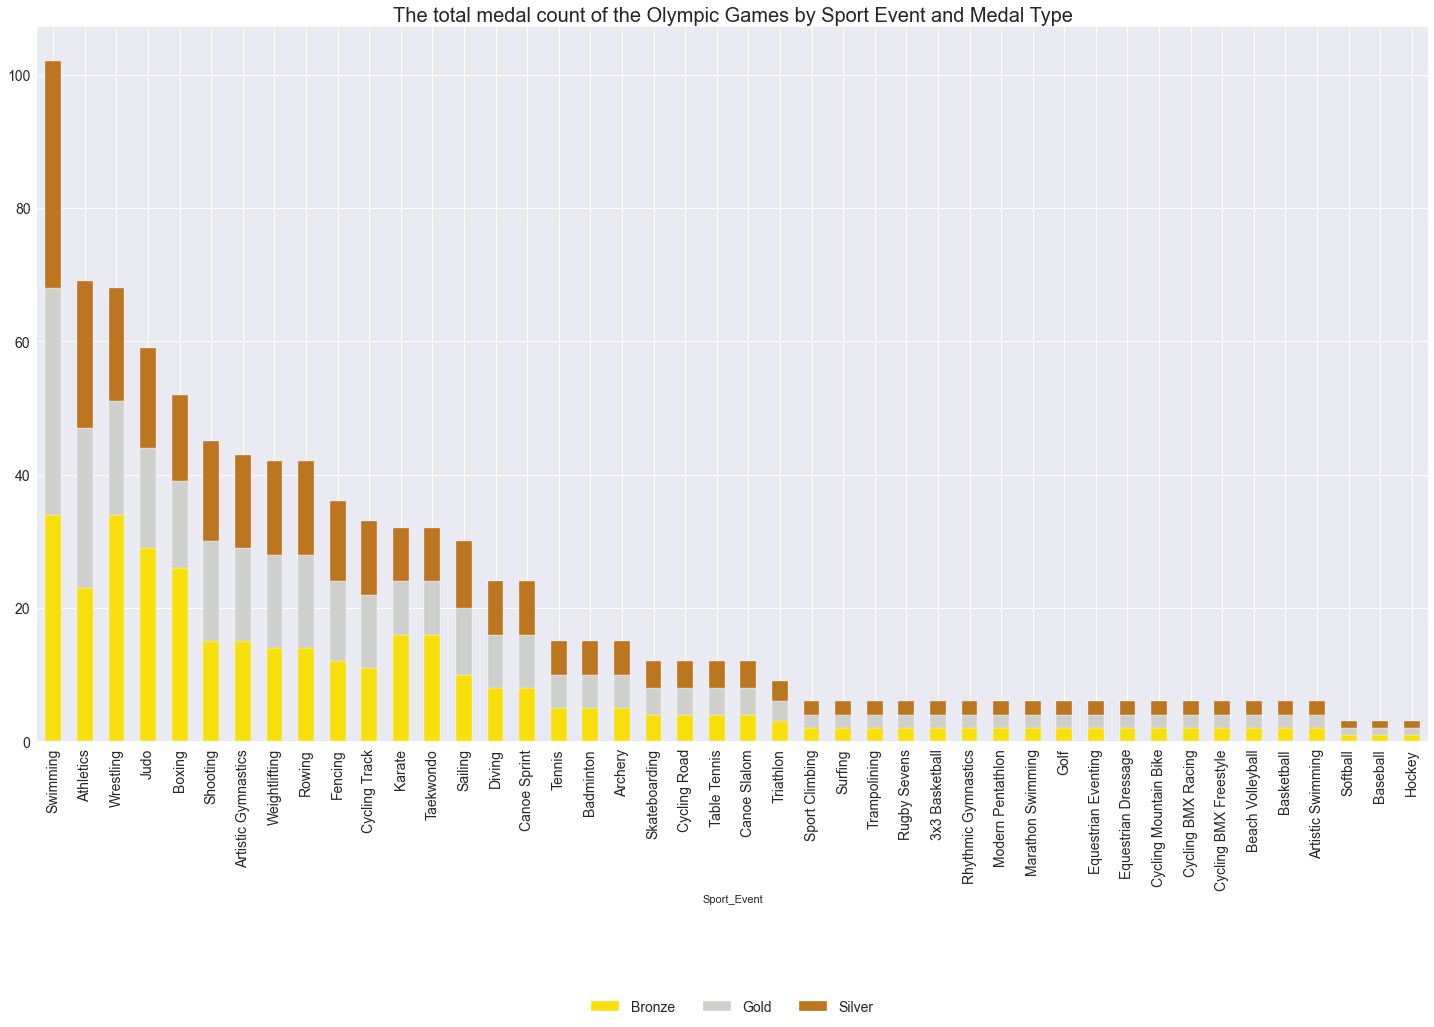

In [756]:
ax = tokyo_2020_df_SportEvent_MedalType.plot(kind='bar', stacked=True,figsize=(20,15), colormap= cmap)
plt.title('The total medal count of the Olympic Games by Sport Event and Medal Type', fontsize=20) 
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.4),
          ncol=4, fancybox=True, shadow=True, prop={'size': 14})
plt.tight_layout()
plt.tick_params(labelsize=14)
plt.savefig('images/image2.png', bbox_inches = "tight")  
plt.show()

<a id='part4-2'></a>
### 4.2 Define bar graph showing the number of medal by Top 10 Countries

In [757]:
tokyo_2020_df["Count"] = 1

In [758]:
tokyo_2020_df_Country = tokyo_2020_df[['Country_Code', 'Count','Country_IMG_URL']]
tokyo_2020_df_Country = tokyo_2020_df_Country.groupby(['Country_Code','Country_IMG_URL'])['Count'].sum().reset_index()

In [759]:
tokyo_2020_df_Country = tokyo_2020_df_Country.sort_values('Count', ascending=False)

In [760]:
tokyo_2020_df_Country = tokyo_2020_df_Country.head(10)

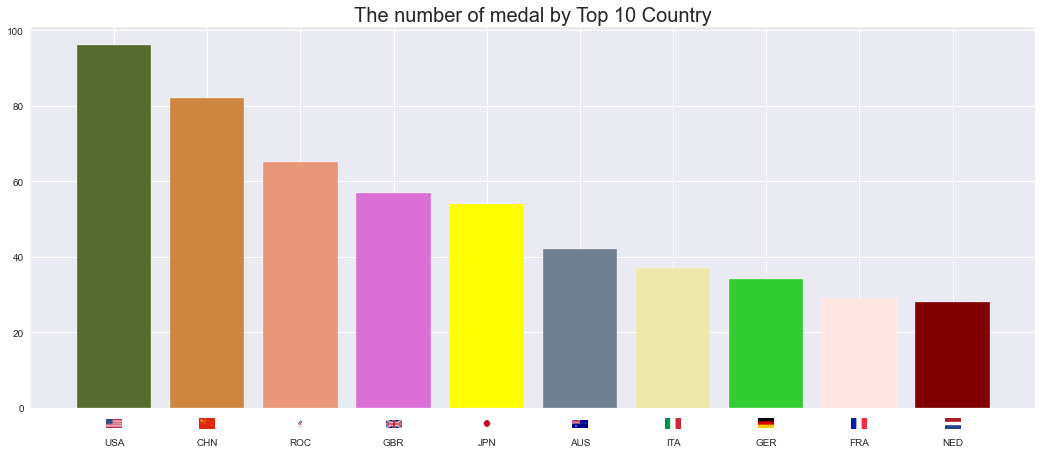

In [761]:
plt.figure(figsize=(18,7))
countries = np.asarray(tokyo_2020_df_Country["Country_IMG_URL"])   

colors = random.choices(list(mcolors.CSS4_COLORS.values()),k = tokyo_2020_df_Country.size)

plt.bar(range(len(countries)), tokyo_2020_df_Country["Count"], color= colors )
plt.gca().set_xticks(range(len(countries)))
plt.gca().set_xticklabels(tokyo_2020_df_Country["Country_Code"])
plt.gca().set_title('The number of medal by Top 10 Country' , fontsize=20)
plt.tick_params(axis='x', which='major', pad=30)
for i, c in enumerate(countries):
    offset_image(i, c, plt.gca())

plt.savefig('images/image3.png')
plt.show();

In [762]:
tokyo_2020_df_Medal_type_Country = tokyo_2020_df.groupby(['Medal','Country_Code']).size() \
                             .reset_index() \
                             .pivot(columns='Medal', index='Country_Code', values=0)

In [763]:
tokyo_2020_df_Medal_type_Country

Medal,Bronze,Gold,Silver
Country_Code,,,
ARG,1.0,NaN,NaN
ARM,2.0,NaN,2.0
AUS,20.0,16.0,6.0
AUT,5.0,1.0,1.0
AZE,4.0,NaN,2.0
...,...,...,...
UGA,1.0,1.0,1.0
UKR,11.0,1.0,5.0
USA,28.0,33.0,35.0


In [764]:
tokyo_2020_df_Medal_type_Country["Sum"] = tokyo_2020_df_Medal_type_Country["Bronze"] + \
                                          tokyo_2020_df_Medal_type_Country["Gold"] + \
                                          tokyo_2020_df_Medal_type_Country["Silver"]

In [765]:
tokyo_2020_df_Medal_type_Country = tokyo_2020_df_Medal_type_Country.sort_values(['Sum'], ascending = False)

In [766]:
tokyo_2020_df_Medal_type_Country.drop("Sum", axis=1, inplace=True)

In [767]:
tokyo_2020_df_Medal_type_Country = tokyo_2020_df_Medal_type_Country.head(10)

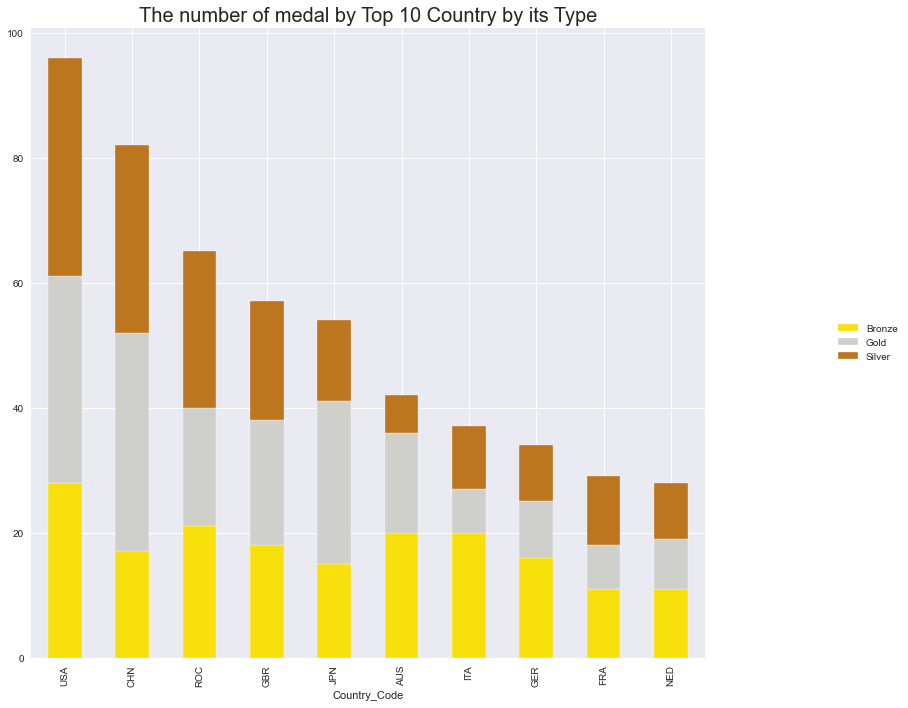

In [768]:
ax = tokyo_2020_df_Medal_type_Country.plot(kind='bar', stacked=True,figsize=(13,10), colormap= cmap)
plt.title('The number of medal by Top 10 Country by its Type', fontsize=20) 
leg = ax.legend(loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)
plt.tight_layout()
plt.savefig('images/image4.png', bbox_inches = "tight")  
plt.show()

<a id='part4-3'></a>
### 4.3 Define a nested pie graph to determine which the medal type were won by athletes in terms of Category Gender Type 

In [769]:
tokyo_2020_df_Medal_Country = pd.DataFrame({'count' : tokyo_2020_df.groupby(['Medal','Category_Gender']).size()}).reset_index()
tokyo_2020_df_Medal_Country = tokyo_2020_df_Medal_Country.sort_values(['count'], ascending = False)

tokyo_2020_df_Medal_Country_outer = tokyo_2020_df_Medal_Country.groupby('Category_Gender').sum()
tokyo_2020_df_Medal_Country_inner = tokyo_2020_df_Medal_Country.groupby(['Category_Gender', 'Medal']).sum()
tokyo_2020_df_Medal_Country_inner_labels = tokyo_2020_df_Medal_Country_inner.index.get_level_values(1)

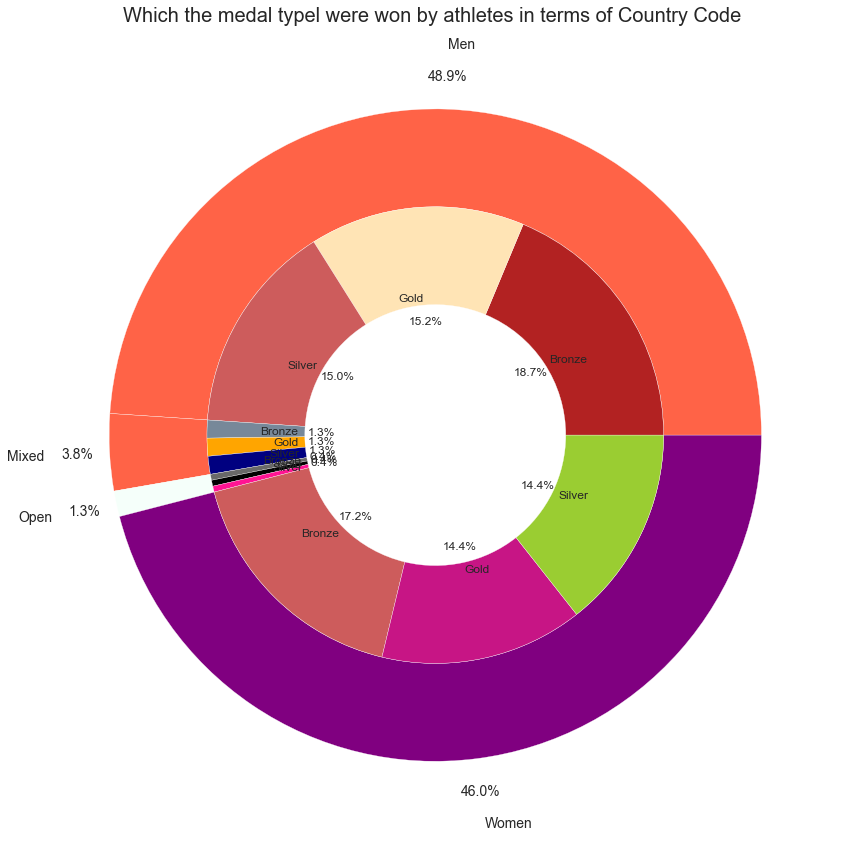

In [770]:
drawnestedpiegraph(tokyo_2020_df_Medal_Country_outer,
                   tokyo_2020_df_Medal_Country_inner,
                   tokyo_2020_df_Medal_Country_inner_labels,
                   "Which the medal typel were won by athletes in terms of Country Code ",
                   "image5.png")

<a id='part4-4'></a>
### 4.4 Define a table graph to show the top 10 number of medal won by athletes in terms of Sport Event by Country Code

In [771]:
tokyo_2020_df_Medal_Sport_Event = tokyo_2020_df.groupby(['Country_Code','Sport_Event'])['Count'] \
                                  .sum().reset_index()

In [772]:
tokyo_2020_df_Medal_Sport_Event

,Country_Code,Sport_Event,Count
0,ARG,Rugby Sevens,1
1,ARM,Artistic Gymnastics,1
2,ARM,Boxing,1
3,ARM,Weightlifting,1
4,ARM,Wrestling,1
...,...,...,...
451,UZB,Weightlifting,1
452,UZB,Wrestling,1
453,VEN,Athletics,1
454,VEN,Cycling BMX Freestyle,1


In [773]:
tokyo_2020_df_Medal_Sport_Event = tokyo_2020_df_Medal_Sport_Event.sort_values('Count', ascending=False)

In [774]:
tokyo_2020_df_Medal_Sport_Event = tokyo_2020_df_Medal_Sport_Event.head(10)
tokyo_2020_df_Medal_Sport_Event

,Country_Code,Sport_Event,Count
443,USA,Swimming,29
21,AUS,Swimming,19
425,USA,Athletics,14
260,JPN,Judo,12
74,CHN,Diving,12
79,CHN,Shooting,11
447,USA,Wrestling,9
84,CHN,Weightlifting,8
170,GBR,Swimming,8
67,CHN,Artistic Gymnastics,8


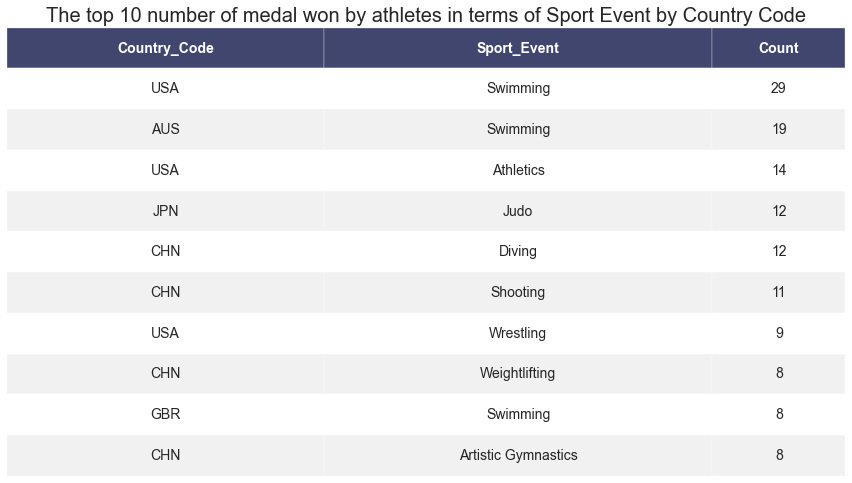

In [775]:
render_mpl_table(tokyo_2020_df_Medal_Sport_Event,
                 title = "The top 10 number of medal won by athletes in terms of Sport Event by Country Code",
                 header_columns=0,
                 col_width=4.0,
                 image_path = 'images/image6.png')

<a id='part4-5'></a>
### 4.5 Draw a WordCloud to show medal-winning athletes' names 

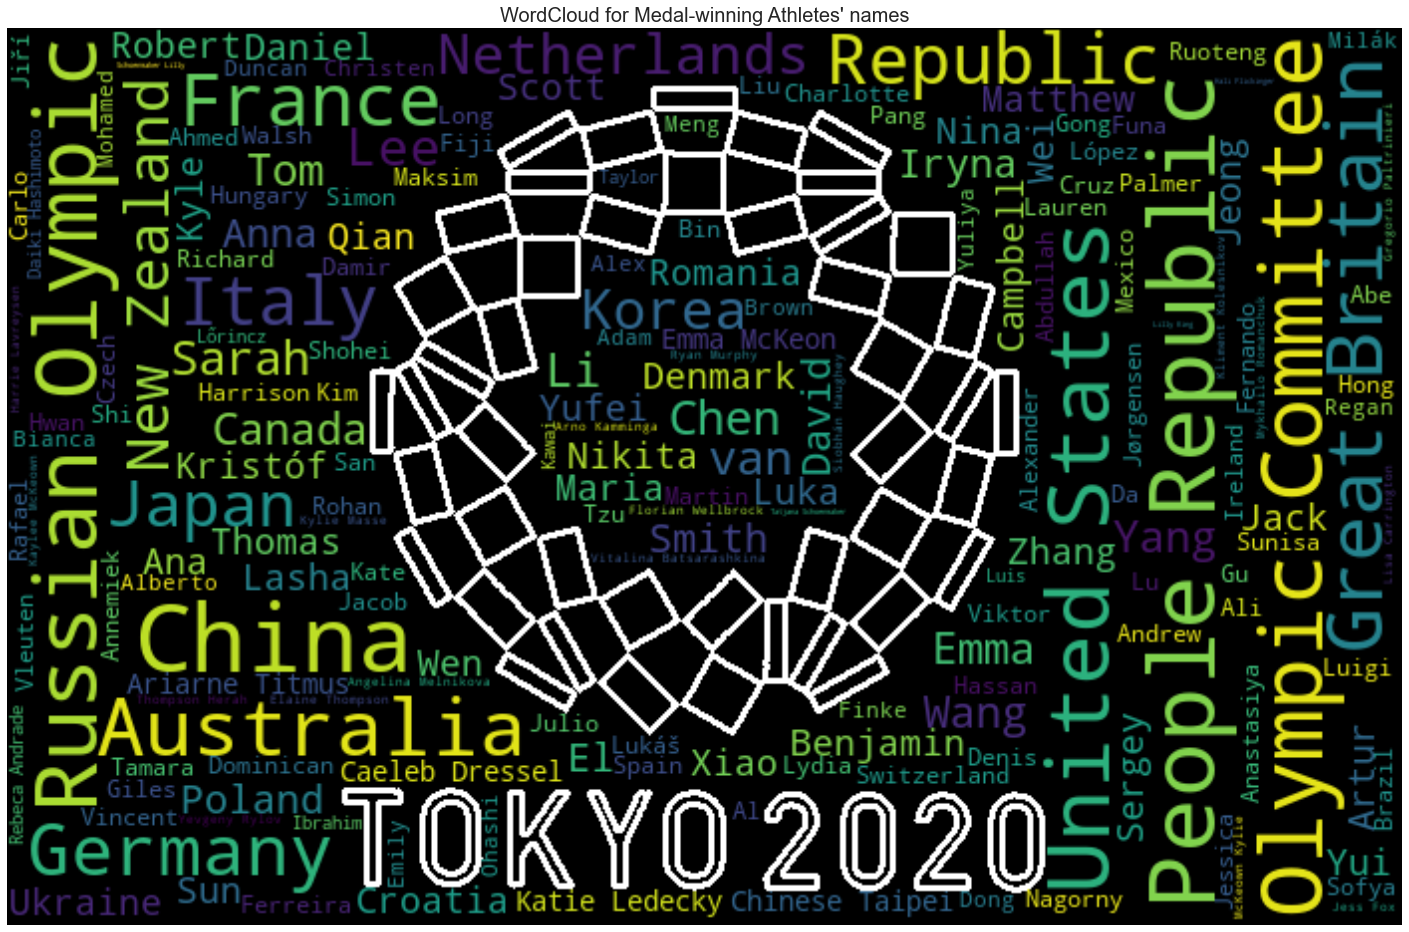

In [776]:
plt.figure(figsize=[25, 25])

image = Image.open("images/word_cloud_image.jpg")
image_gray = image.convert('L')
image_invert = ImageOps.invert(image_gray)
char_mask = np.array(image_invert)
image_colors = ImageColorGenerator(char_mask)


wordcloud = WordCloud(stopwords=STOPWORDS,
                        background_color='black', 
                        #width=1000,  
                        #height=1000, 
                        max_words=300,
                        mask=char_mask,
                        contour_width=3, 
                        contour_color='white',
                    ).generate(' '.join(tokyo_2020_df['Athlete_Full_Name']))


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud for Medal-winning Athletes' names", fontsize=20)
plt.savefig('images/image7.png')
plt.show()